<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-06%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎄 EXPLORATION 06**

- **🌲 EXPLORATION 06-1 : 학습 내용**  
- **🌲 EXPLORATION 06-2 : 멋진 가사가 만들기**  
    - **🌿 01_데이터 준비**  
        - 01-1_라이브러리 import  
        - 01-2_데이터 import  
        - 01-3_데이터 확인  
    - **🌿 02_데이터 정제**  
        - 02-1_내용 정제   
        - 02-2_정제 완료 및 데이터 확인  
        - 02-3_벡터화   
        - 02-4_토큰화  
        - 02-5_단어 사전 인덱스 구축 확인           
        - 02-6_정제 완료 및 데이터 확인           
        - 02-7_문장 생성 함수          
    - **🌿 03_평가 데이터셋 분리**
        - 03-1_데이터셋 객체 생성  
        - 03-2_데이터셋 형태 확인  
    - **🌿 04_모델 제작**  
        - 04-1_모델 제작  
        - 04-2_모델 임시 확인  
        - 04-3_모델 구조 확인  
        - 04-4_모델 학습 환경    
    - **🌿 05_모델 학습 및 평가**    
        - 05-1_모델 학습  
        - 05-2_모델 평가   

<hr>

# **🌲 EXPLORATION 06-1 : 학습 내용**

- **시퀀스(Sequence)**  
- **순환신경망(RNN)**  
- **언어 모델 (Language Model)**  
- **토큰화(Tokenize)**  
- **정규표현식(Regex)**  
- **소스 문장 / 타겟 문장**  
- **벡터화(vectorize)**  
- **텐서(tensor)**  
- **RNN**  

<hr>

# **🌲 EXPLORATION 06-2 : 멋진 가사가 만들기**

## **🌿 01_데이터 준비**  

### **🍃 01-1_라이브러리 import**

- **os**  
운영체제 기능 사용  

- **re**  
정규표현식 사용 

- **glob**  
파일 경로를 이용한 제어     

- **matplotlib**  
시각화  

- **numpy**  
수치 계산  

- **tensorflow**    
딥러닝 프로그램 구현  

- **from sklearn.model_selection import train_test_split**    
학습 셋 / 테스트 셋 분리  

In [ ]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split

### **🍃 01-2_데이터 import** 

- **glob.glob()**  
해당 저장경로 내 해당 확장자를 리스트 형식으로 반환  

In [ ]:
txt_file_path = os.getenv('HOME')+'/aiffel/exploration/E-06/data/lyricist/models/data/lyrics/*'
txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 파일을 읽기모드로 열고 라인 단위로 끊은 형태로 호출
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

### **🍃 01-3_데이터 확인** 

- **데이터 크기 및 샘플 출력**

In [ ]:
# 데이터 크기 출력
print("데이터 크기\n", len(raw_corpus))

# 3라인 순차 출력
print("\nExamples\n", raw_corpus[:3])

데이터 크기
 187088

Examples
 ["Busted flat in Baton Rouge, waitin' for a train", "And I's feelin' near as faded as my jeans", 'Bobby thumbed a diesel down, just before it rained']


<hr>

## **🌿 02_데이터 정제**  

### **🍃 02-1_내용 정제** 

- **입력 문장 정제**
    - **.replace()**  
    특정 문자를 다른 문자로 치환  

    - **lower()**  
    소문자로 변경  

    - **strip()**  
    공백 제거

    - **re.sub()**  
    정규표현식을 활용한 문자 치환  

In [ ]:
def preprocess_sentence(sentence):

    # 소문자로 변경, 양쪽 공백 제거
    sentence = sentence.lower().strip()

    # 특수문자 양쪽 공백 삽입  
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)

    # 여러개의 공백을 하나의 공백으로 변환  
    sentence = re.sub(r'[" "]+', " ", sentence)

    # 지정 특수기호가 아닌 모든 문자를 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)

    # 필요 없는 문자 삭제   
    sentence = sentence.replace('[Chorus]', '')
    sentence = sentence.replace('[Verse 1]', '')
    sentence = sentence.replace('[Verse 2]', '')
    sentence = sentence.replace('[Hook]', '')
    sentence = sentence.replace('[Pre-Hook]', '')

    # 양쪽 공백 삭제
    sentence = sentence.strip()
    sentence = '<start> ' + sentence + ' <end>'

    return sentence

### **🍃 02-2_정제 완료 및 데이터 확인** 

- **.split()**  
분할  
- **.append()**  
요소 추가  

In [ ]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if sentence[-1] == "]": continue
    
    

    preprocessed_sentence = preprocess_sentence(sentence)
    if len(preprocessed_sentence.split()) > 15: continue
    corpus.append(preprocessed_sentence)

corpus[:10]

['<start> busted flat in baton rouge , waitin for a train <end>',
 '<start> and i s feelin near as faded as my jeans <end>',
 '<start> bobby thumbed a diesel down , just before it rained <end>',
 '<start> i was playin soft while bobby sang the blues , yeah <end>',
 '<start> windshield wipers slappin time , i was holdin bobby s hand in mine <end>',
 '<start> you know , feelin good was good enough for me <end>',
 '<start> there bobby shared the secrets of my soul <end>',
 '<start> through all kinds of weather , through everything we done <end>',
 '<start> he s lookin for that home , and i hope he finds it <end>',
 '<start> nothin , that s all that bobby left me , yeah <end>']

### **🍃 02-3_벡터화** 

- **tf.keras.preprocessing.text.Tokenizer**  
Tensorflow를 활용한 Tokenize 전처리  
텍스트를 단어 기반으로 토큰화 / 단어 사전 제작 / 데이터를 숫자로 변환   
    - **num_words**  
    전체 단어 수  
    - **filters**  
    별도의 전처리 추가  
    - **oov_token**  
    out-of-vocabulary / 사전에 없는 단어 대체 토큰  
- **tf.keras.preprocessing.sequence.pad_sequences**  
패딩 진행  
    - **padding**  
    앞에 0 채움 (기본) / 뒤에 0 채우고 싶은 경우 padding = 'post' 사용  
    - **maxlen**  
    해당 정수 값 만큼 시퀀스 길이 동일하게 설정    

In [ ]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words = 15000, 
        filters=' ',
        oov_token="<unk>"
    )
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)   
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen = 15)  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

### **🍃 02-4_토큰화** 

- **tokenize( )**  
토큰화  

In [ ]:
tensor, tokenizer = tokenize(corpus)

[[   2 3991 1671 ...    0    0    0]
 [   2    8    4 ...    0    0    0]
 [   2  887 6793 ...    0    0    0]
 ...
 [   2 4748    5 ...    0    0    0]
 [   2   22   22 ...    3    0    0]
 [   2    3    0 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7fbff42a6e50>


### **🍃 02-5_단어 사전 인덱스 구축 확인** 

In [ ]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : ,
6 : the
7 : you
8 : and
9 : a
10 : to


### **🍃 02-6_정제 완료 및 데이터 확인** 

In [ ]:
src_input = tensor[:, :-1]  
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[    2  3991  1671    14 12414  4458     5  1288    28     9   634     3
     0     0]
[ 3991  1671    14 12414  4458     5  1288    28     9   634     3     0
     0     0]


### **🍃 02-7_문장 생성 함수** 

- **tf.argmax()**  
최대값을 가지는 데이터 요소 추출  

- **tokenizer.word_index**  
단어와 숫자의 키-값 쌍을 포함하는 딕셔너리 반환

In [ ]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    while True:
        # 입력받은 문장의 텐서를 입력
        predict = model(test_tensor)
        # 모델이 예측한 마지막 단어 = 바로 새롭게 생성한 단어  
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]
        # 우리 모델이 새롭게 예측한 단어를 입력 문장의 뒤에 삽입  
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # <END>, max_len에 도달하지 않을 시 while 루프 돌면서 다음 단어를 예측  
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # 생성된 tensor 안에 있는 word index를 tokenizer.index_word 사전을 통해 단어로 하나씩 변환
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

<hr>

## **🌿 03_평가 데이터셋 분리**  

### **🍃 03-1_데이터셋 객체 생성** 

- **tf.data.Dataset.from_tensor_slices()**  
tf.data.Dataset 객체 생성  

- **train_test_split**  
train / test 분리  
전체의 20% 데이터 test로 사용  

In [ ]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1

X_train, X_val, y_train, y_val = train_test_split(src_input, tgt_input, test_size=0.2, random_state=25)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)

### **🍃 03-2_데이터셋 형태 확인** 

- **.shape**  
차원 형태 확인  

In [ ]:
print(X_train.shape)
print(y_train.shape)

(124076, 14)
(124076, 14)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(31020, 14)
(31020, 14)


- **_dataset**  
데이터 셋 확인  

In [ ]:
train_dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

In [ ]:
val_dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

<hr>

## **🌿 04_모델 제작**

### **🍃 04-1_모델 제작**

- **Embedding layer**  
1개  
인덱스 값을 해당 순서의 워드 벡터로 변환  
- **LSTM layer**  
2개  
- **Dense layer**  
1개

In [ ]:
class TextGenerator(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)

    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out

- **embedding_size**  
차원 크기 (단어가 추상적으로 표현되는 크기)  
- **hidden_size**  
hidden state 의 차원수

In [ ]:
embedding_size = 800
hidden_size = 3000
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

### **🍃 04-2_모델 임시 확인**  

- **데이터셋에서 데이터 한 배치만 호출해 확인**  

In [ ]:
for src_sample, tgt_sample in train_dataset.take(1): break
model(src_sample)

<tf.Tensor: shape=(256, 14, 15001), dtype=float32, numpy=
array([[[-4.09009430e-04, -1.64461104e-04,  1.12753391e-04, ...,
         -2.25251904e-04,  3.43091582e-04,  6.12408447e-04],
        [-1.17768347e-03, -3.68402805e-04, -9.13951735e-05, ...,
          5.35605286e-05,  7.92452425e-04,  4.21585952e-04],
        [-1.50818366e-03, -6.36258046e-04, -3.68758221e-04, ...,
          3.62952851e-04,  1.11246062e-03,  4.33767273e-04],
        ...,
        [-1.50055683e-03, -4.76013374e-04, -5.84574137e-03, ...,
          8.74041754e-04,  5.09211607e-03, -2.24959967e-03],
        [-1.48496602e-03, -3.24572116e-04, -6.14673179e-03, ...,
          7.32184330e-04,  5.26099792e-03, -2.35676882e-03],
        [-1.48861110e-03, -1.65096833e-04, -6.37711817e-03, ...,
          5.59331966e-04,  5.37692849e-03, -2.46206019e-03]],

       [[-4.09009430e-04, -1.64461104e-04,  1.12753391e-04, ...,
         -2.25251904e-04,  3.43091582e-04,  6.12408447e-04],
        [-6.23064872e-04, -1.59740976e-05,  2

### **🍃 04-3_모델 구조 확인**  

- **Embedding layer**  
1개  
- **LSTM layer**  
2개  
- **Dense layer**  
1개  
- **총 파라미터 / 학습 가능 파라미터**  
174,642,801 / 174,642,801

In [ ]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  12000800  
_________________________________________________________________
lstm (LSTM)                  multiple                  45612000  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  72012000  
_________________________________________________________________
dense (Dense)                multiple                  45018001  
Total params: 174,642,801
Trainable params: 174,642,801
Non-trainable params: 0
_________________________________________________________________


### **🍃 04-4_모델 학습 환경**  

- **model.compile()**  
모델 학습 환경 설정  
- **optimizer**  
옵티마이저 - Adam 
- **손실함수**  
Sparse Categorical Cross Entropy  
label이 정수 형태를 띄고 있는 경우 사용  
- **metrics**  
모델 평가 방법  
tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none'),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

<hr>

## **🌿 05_모델 학습 및 평가**

### **🍃 05-1_모델 학습**

history에 loss, accurancy 저장  
- **model.fit()**  
모델 학습  

In [ ]:
history = model.fit(train_dataset,
            epochs=10,
            batch_size=256,
            validation_data=val_dataset,
            verbose=1)

Epoch 1/10
484/484 [==============================] - 542s 1s/step - loss: 3.2602 - sparse_categorical_accuracy: 0.5058 - val_loss: 2.9189 - val_sparse_categorical_accuracy: 0.5299
Epoch 2/10
484/484 [==============================] - 540s 1s/step - loss: 2.7341 - sparse_categorical_accuracy: 0.5431 - val_loss: 2.6770 - val_sparse_categorical_accuracy: 0.5521
Epoch 3/10
484/484 [==============================] - 539s 1s/step - loss: 2.4108 - sparse_categorical_accuracy: 0.5717 - val_loss: 2.4981 - val_sparse_categorical_accuracy: 0.5757
Epoch 4/10
484/484 [==============================] - 540s 1s/step - loss: 2.0835 - sparse_categorical_accuracy: 0.6105 - val_loss: 2.3580 - val_sparse_categorical_accuracy: 0.6000
Epoch 5/10
484/484 [==============================] - 540s 1s/step - loss: 1.7703 - sparse_categorical_accuracy: 0.6570 - val_loss: 2.2575 - val_sparse_categorical_accuracy: 0.6239
Epoch 6/10
484/484 [==============================] - 540s 1s/step - loss: 1.4933 - sparse_cate

### **🍃 05-2_모델 평가**

- **정확도 / 손실 시각화**  

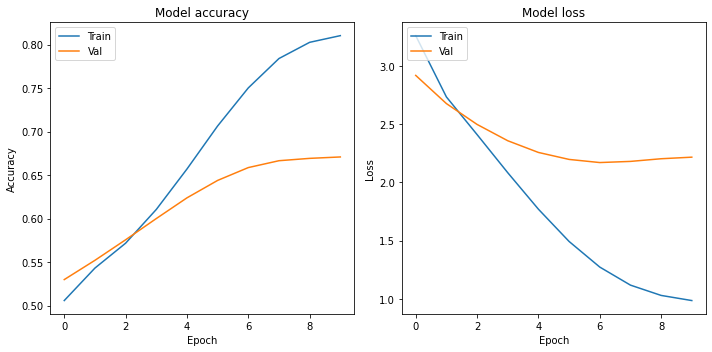

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)  
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

<hr>

## **🌿 06_한줄 가사 생성**

In [ ]:
print(generate_text(model, tokenizer, init_sentence="<start> i", max_len=25))
print(generate_text(model, tokenizer, init_sentence="<start> i love", max_len=25))
print(generate_text(model, tokenizer, init_sentence="<start> i know", max_len=25))
print('\n')
print(generate_text(model, tokenizer, init_sentence="<start> you", max_len=25))
print(generate_text(model, tokenizer, init_sentence="<start> you have", max_len=25))
print(generate_text(model, tokenizer, init_sentence="<start> you say", max_len=25))

<start> i m a superwoman oh ooh baby , baby , baby , baby <end> 
<start> i love you slim , we coulda been together , think about it <end> 
<start> i know you feel me now <end> 


<start> you know i extra do it they say im the best to do <end> 
<start> you have no reason to be gone <end> 
<start> you say you disturb me <end> 


<hr>